In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import math
from vyper.utils import SizeLimits
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

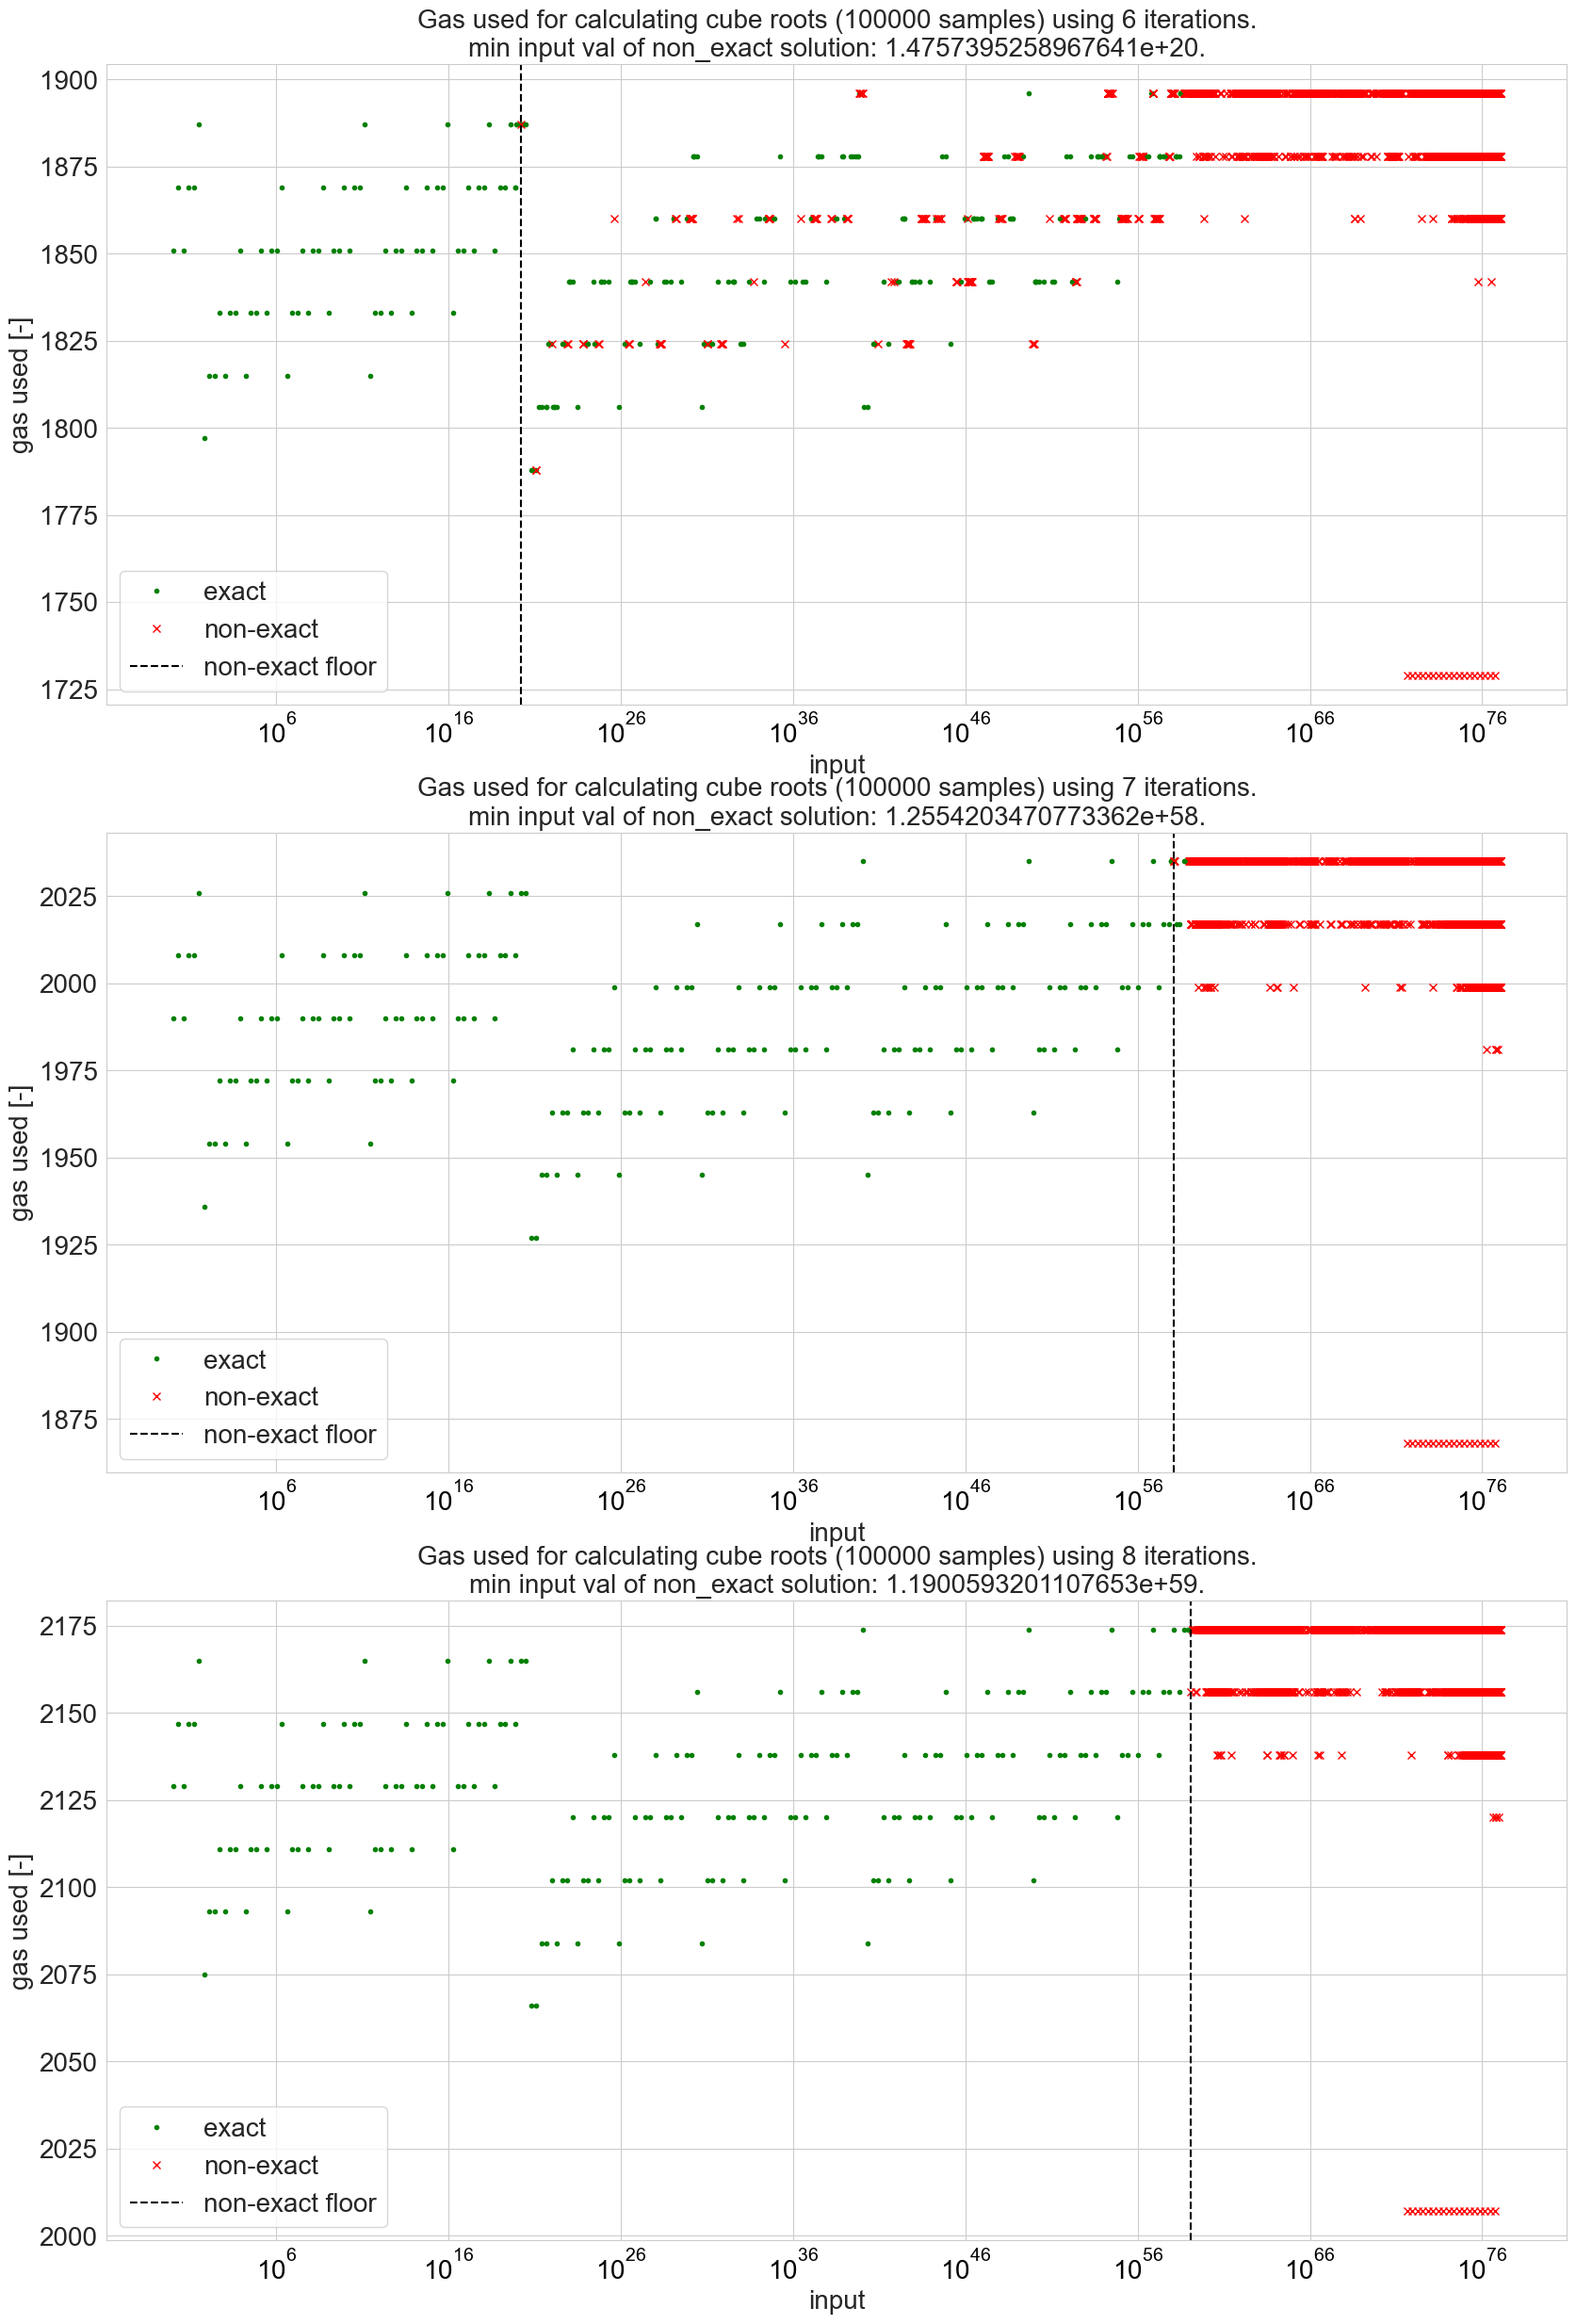

In [2]:
fig, ax = plt.subplots(3,1, figsize=(20, 30))

c = 0
for i in [6, 7, 8]:

    data = pd.read_csv(f"../../data/cbrt_analysis_{i}iter.csv")
    data["input"] = data["input"].apply(lambda x: mpz(x))
    data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
    data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
    data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]

    ax[c].plot(
        data[data.diff_ideal_impl == 0].input,
        data[data.diff_ideal_impl == 0].gasused,
        '.',
        color="green",
        label="exact"
    )
    ax[c].plot(
        data[data.diff_ideal_impl != 0].input,
        data[data.diff_ideal_impl != 0].gasused,
        'x',
        color="red",
        label="non-exact"
    )
    
    non_exact_floor = float(data[(data.diff_ideal_impl != 0)].input.min())
    
    ax[c].axvline(x=non_exact_floor, color="black", linestyle="--", label="non-exact floor")

    ax[c].set_xlabel("input", fontsize=20)
    ax[c].set_ylabel("gas used [-]", fontsize=20)
    ax[c].tick_params(axis='both', which='major', labelsize=20)
    ax[c].tick_params(axis='x', which='major', colors='black');
    ax[c].set_xscale("log")
    ax[c].legend(fontsize=20)
    ax[c].set_title(
        f"Gas used for calculating cube roots ({data.shape[0]} samples) using {i} iterations.\n"
        f"min input val of non_exact solution: {non_exact_floor}.", 
        fontsize=20
    );
    
    c+=1

# Edge analysis

Where does it get worse?

In [3]:
data = pd.read_csv(f"../../data/cbrt_analysis_edge.csv")
data["input"] = data["input"].apply(lambda x: mpz(x))
data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]
data["abs_diff_ideal_impl"] = data["diff_ideal_impl"].abs()

data

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl,abs_diff_ideal_impl
0,1064096075130316597108404175000526402275751886...,47387116249064522467500403,47387116249064522467500428,2035,-25,25
1,1148809637999922100666825008182748020676217092...,48612656782454508031661778,48612656782454508031662974,2035,-1196,1196
2,1107125284853080985684116912910498045742776910...,48017431239277322707395962,48017431239277322707396154,2035,-192,192
3,1059945223295952105143506840118342276040990628...,47325419685275389346561102,47325419685275389346561123,2035,-21,21
4,1093635433904490892278166248976806845606612619...,47821609742955553020224394,47821609742955553020224497,2035,-103,103
...,...,...,...,...,...,...
29995,1051906000861491081097386136810053080359739511...,47205468353762083229315372,47205468353762083229315386,2035,-14,14
29996,1147794211935479853519981476694118672467912730...,48598329746877981599470263,48598329746877981599471409,2035,-1146,1146
29997,1139918980967559908832701348920881502842659424...,48486927159551171080539876,48486927159551171080540694,2035,-818,818
29998,1114367636811426578406595698393172548539990847...,48121907094405088862306202,48121907094405088862306467,2035,-265,265


In [4]:
to_plot = data[data.diff_ideal_impl != 0].sort_values(by="abs_diff_ideal_impl", ascending=False).reset_index(drop=True)
to_plot

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl,abs_diff_ideal_impl
0,1157928191015983868155652646548352432661112877...,48740937220635499691457047,900355531218043238435919,2017,47840581689417456453021128,47840581689417456453021128
1,1157929925636630593301508799402585070486987103...,48740961559218404753786807,966677386131962363504956,2017,47774284173086442390281851,47774284173086442390281851
2,1157935160542028354893060951152500879568310364...,48741035010392665463492488,1125786613421843154594031,2017,47615248396970822308898457,47615248396970822308898457
3,1157909280223288802819724586225747350892754207...,48740671880411322786964073,48740671880411322786965830,2035,-1757,1757
4,1157907801387577952891581557472953436573587195...,48740651130519523733062200,48740651130519523733063956,2035,-1756,1756
...,...,...,...,...,...,...
29995,1017759239711655524253925327619865830675156344...,46689047921989439514287243,46689047921989439514287245,2035,-2,2
29996,1019116552005947453411595156793890939588320392...,46709793977227110497927020,46709793977227110497927022,2035,-2,2
29997,1019919932004354576027593693664730793082468154...,46722064689482294965648020,46722064689482294965648022,2035,-2,2
29998,1016578195337779291376197852196212810505725064...,46670981049032380603164441,46670981049032380603164443,2035,-2,2


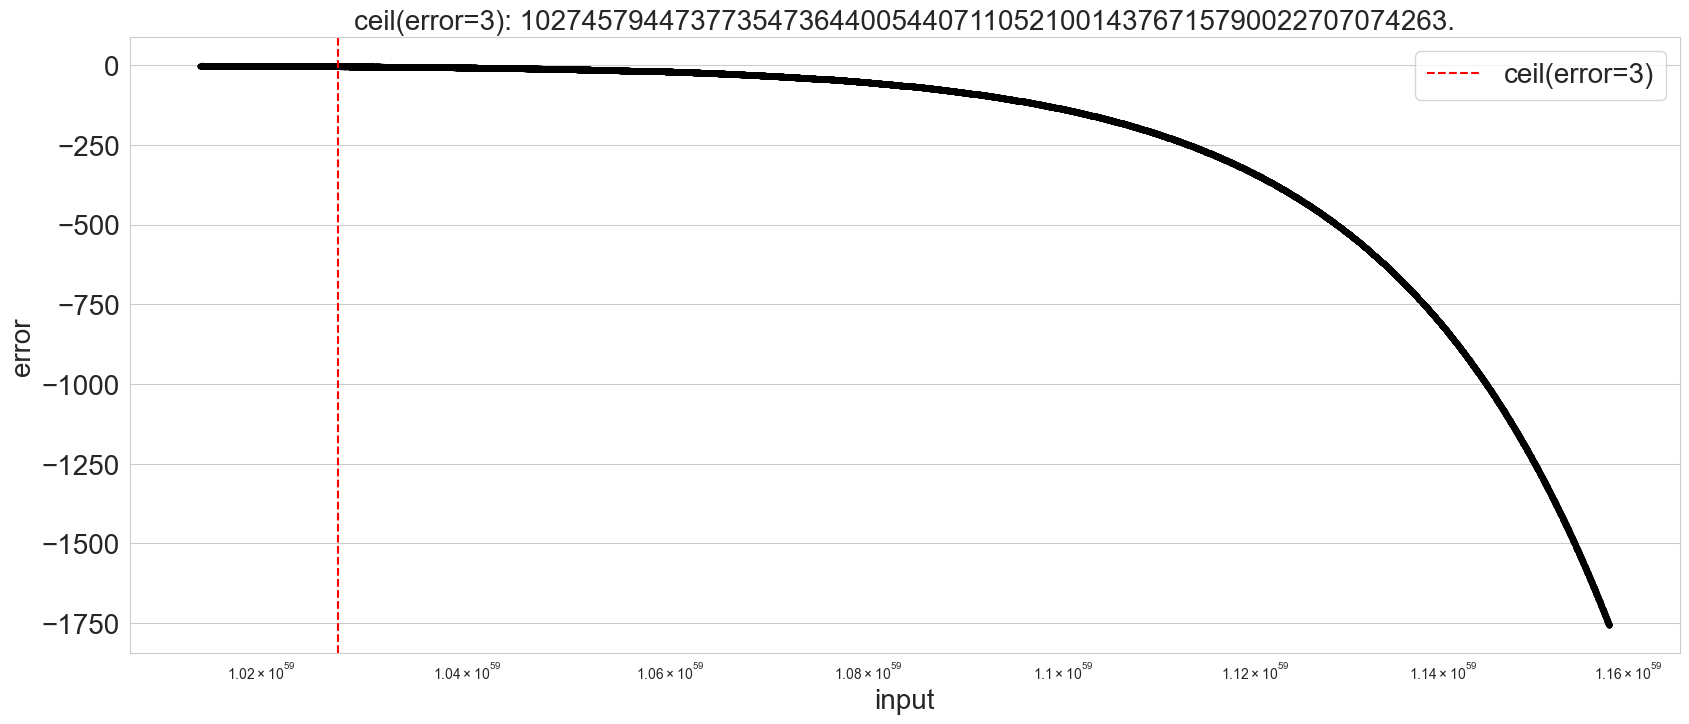

In [5]:
to_plot = data[data.diff_ideal_impl != 0].sort_values(by="abs_diff_ideal_impl", ascending=False).reset_index(drop=True)
to_plot = to_plot[to_plot.abs_diff_ideal_impl < 2000]

fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    to_plot.input,
    to_plot.diff_ideal_impl,
    '.',
    color="black",
)

to_plot = to_plot[to_plot.abs_diff_ideal_impl <= 3]
ceil_acceptable_error = to_plot.input.max()

ax.axvline(x=ceil_acceptable_error, color="red", linestyle="--", label="ceil(error=3)")

ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("error", fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_title(f"ceil(error=3): {ceil_acceptable_error}.", fontsize=20);
ax.legend(fontsize=20);

In [6]:
sorted_data = data[data.diff_ideal_impl != 0].sort_values(by="abs_diff_ideal_impl", ascending=False).reset_index(drop=True)
sorted_data

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl,abs_diff_ideal_impl
0,1157928191015983868155652646548352432661112877...,48740937220635499691457047,900355531218043238435919,2017,47840581689417456453021128,47840581689417456453021128
1,1157929925636630593301508799402585070486987103...,48740961559218404753786807,966677386131962363504956,2017,47774284173086442390281851,47774284173086442390281851
2,1157935160542028354893060951152500879568310364...,48741035010392665463492488,1125786613421843154594031,2017,47615248396970822308898457,47615248396970822308898457
3,1157909280223288802819724586225747350892754207...,48740671880411322786964073,48740671880411322786965830,2035,-1757,1757
4,1157907801387577952891581557472953436573587195...,48740651130519523733062200,48740651130519523733063956,2035,-1756,1756
...,...,...,...,...,...,...
29995,1017759239711655524253925327619865830675156344...,46689047921989439514287243,46689047921989439514287245,2035,-2,2
29996,1019116552005947453411595156793890939588320392...,46709793977227110497927020,46709793977227110497927022,2035,-2,2
29997,1019919932004354576027593693664730793082468154...,46722064689482294965648020,46722064689482294965648022,2035,-2,2
29998,1016578195337779291376197852196212810505725064...,46670981049032380603164441,46670981049032380603164443,2035,-2,2


# Final CBRT implementation:

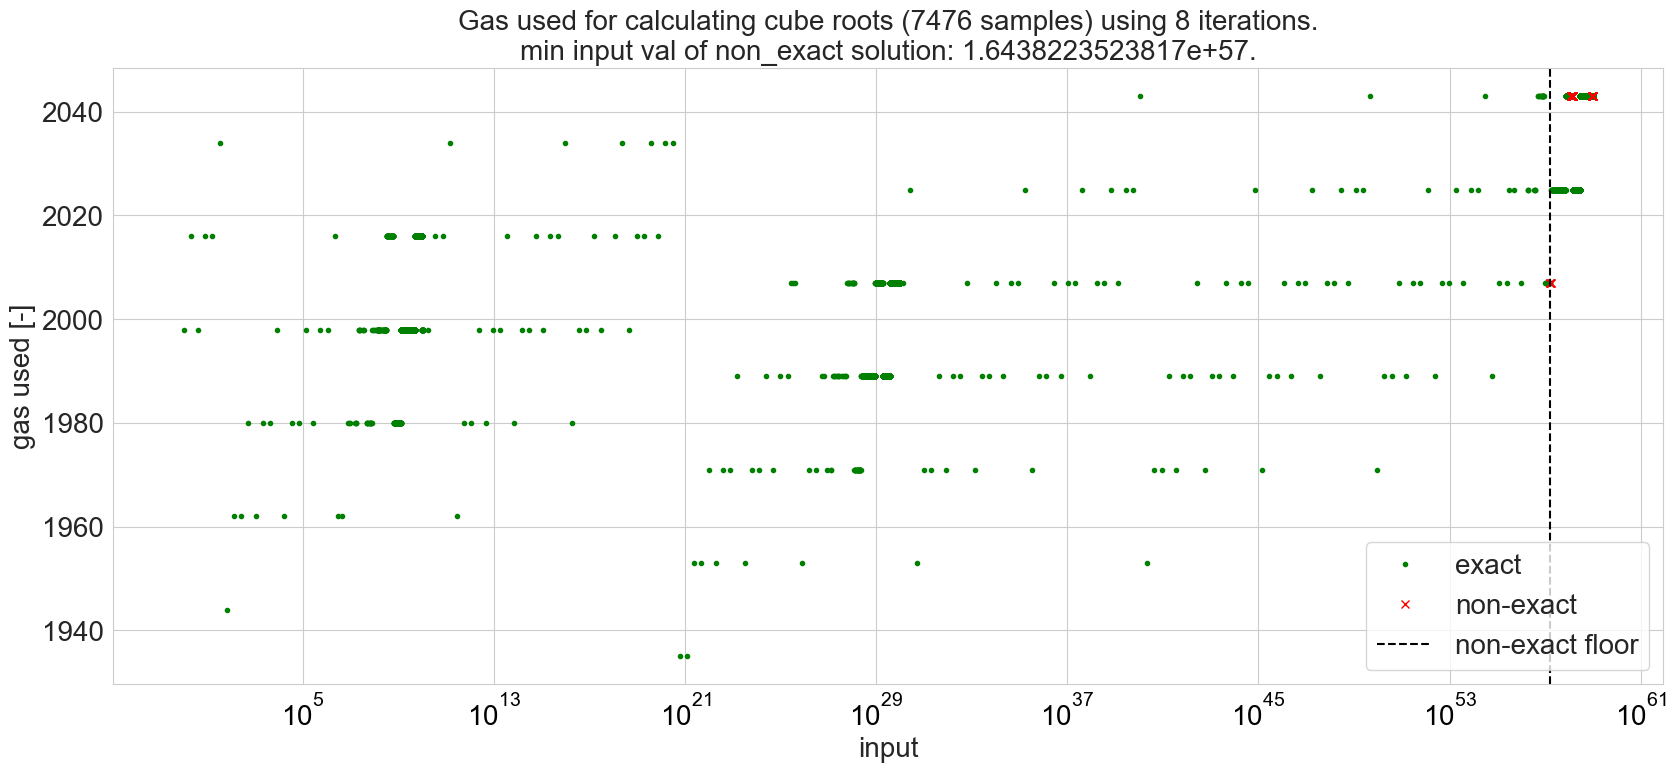

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

data = pd.read_csv(f"../../data/cbrt_analysis.csv")
data["input"] = data["input"].apply(lambda x: mpz(x))
data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]
data["abs_diff_ideal_impl"] = data["diff_ideal_impl"].abs()

data = data[data.cbrt_implementation != -1]


ax.plot(
    data[data.diff_ideal_impl == 0].input,
    data[data.diff_ideal_impl == 0].gasused,
    '.',
    color="green",
    label="exact"
)

ax.plot(
    data[data.diff_ideal_impl != 0].input,
    data[data.diff_ideal_impl != 0].gasused,
    'x',
    color="red",
    label="non-exact"
)

non_exact_floor = float(data[(data.diff_ideal_impl != 0)].input.min())

ax.axvline(x=non_exact_floor, color="black", linestyle="--", label="non-exact floor")

ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20)
ax.set_title(
    f"Gas used for calculating cube roots ({data.shape[0]} samples) using {i} iterations.\n"
    f"min input val of non_exact solution: {non_exact_floor}.", 
    fontsize=20
);

In [13]:
data.astype(float).describe()

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl,abs_diff_ideal_impl
count,7.476000e+03,7.476000e+03,7.476000e+03,7476.000000,7476.000000,7476.000000
mean,1.594318e+58,1.130574e+25,1.130574e+25,2015.225923,-1.036383,1.036383
std,2.818891e+58,1.695970e+25,1.695970e+25,19.312586,20.710458,20.710458
min,1.000000e+00,1.000000e+06,1.000000e+06,1935.000000,-767.000000,0.000000
25%,7.829188e+09,1.985663e+09,1.985663e+09,1998.000000,0.000000,0.000000
50%,5.048482e+29,7.962576e+15,7.962576e+15,2007.000000,0.000000,0.000000
75%,2.243837e+58,2.820528e+25,2.820528e+25,2043.000000,0.000000,0.000000
max,9.997757e+58,4.641242e+25,4.641242e+25,2043.000000,0.000000,767.000000
